In [1]:
import numpy as np
import pandas as pd

# CHECKLIST
[] eaf_final_chemical_measurements

[x] eaf_temp

[x] lf_initial_chemical_measurements

[x] ladle_tapping

[x] basket_charged

[x] eaf_added_materials

[x] lf_added_materials

[x] eaf_transformer

[x] inj_mat

[x] eaf_gaslance_mat 

# eaf_temp.csv, exploración de los datos

In [2]:
df_eaf_temp = pd.read_csv('eaf_temp.csv')
df_eaf_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85104 entries, 0 to 85103
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HEATID     85104 non-null  object 
 1   DATETIME   85104 non-null  object 
 2   TEMP       85104 non-null  float64
 3   VALO2_PPM  85104 non-null  float64
dtypes: float64(2), object(2)
memory usage: 2.6+ MB


In [3]:
df_eaf_temp.head()

,HEATID,DATETIME,TEMP,VALO2_PPM
0,6F0020,2016-01-01 19:15:00,1650.0,1242.0
1,6F0021,2016-01-01 20:05:00,1649.0,1160.0
2,6F0021,2016-01-01 20:05:00,1649.0,1160.0
3,6F0021,2016-01-01 20:03:00,1606.0,1152.0
4,6F0022,2016-01-01 21:03:00,1636.0,947.0


In [4]:
# Change to datetime
df_eaf_temp['DATETIME'] = pd.to_datetime(df_eaf_temp['DATETIME'])
df_eaf_temp

,HEATID,DATETIME,TEMP,VALO2_PPM
0,6F0020,2016-01-01 19:15:00,1650.0,1242.0
1,6F0021,2016-01-01 20:05:00,1649.0,1160.0
2,6F0021,2016-01-01 20:05:00,1649.0,1160.0
3,6F0021,2016-01-01 20:03:00,1606.0,1152.0
4,6F0022,2016-01-01 21:03:00,1636.0,947.0
...,...,...,...,...
85099,5F8441,2015-12-31 21:53:00,1653.0,0.0
85100,5F8441,2015-12-31 21:54:00,1650.0,1133.0
85101,5F8441,2015-12-31 21:52:00,1603.0,0.0
85102,5F8442,2015-12-31 22:38:00,1667.0,1253.0


Los datos estan completos, no tienen nulos, sin embargo, quiero ver cuantos como se comporta la temperatura y el valo2_ppm

In [5]:
# Explorar cuartiles de TEMP y VALO2_PPM

df_eaf_temp[['TEMP', 'VALO2_PPM']].describe()

,TEMP,VALO2_PPM
count,85104.000000,85104.000000
mean,1632.879841,891.918256
std,27.407976,1271.283796
min,1115.000000,0.000000
25%,1616.000000,579.000000
50%,1635.000000,797.000000
75%,1651.000000,990.000000
max,1850.000000,9999.000000


In [6]:
# Buscar casos donde VALO2_PPM < 579
df_eaf_temp[df_eaf_temp['VALO2_PPM'] < 579]

,HEATID,DATETIME,TEMP,VALO2_PPM
11,6F0024,2016-01-01 23:45:00,1642.0,33.0
32,6F0032,2016-01-02 06:39:00,1623.0,28.0
50,6F0036,2016-01-02 10:06:00,1606.0,25.0
55,6F0037,2016-01-02 10:57:00,1609.0,0.0
59,6F0040,2016-01-02 13:27:00,1595.0,0.0
...,...,...,...,...
85091,5F8439,2015-12-31 20:07:00,1644.0,0.0
85098,5F8441,2015-12-31 21:51:00,1563.0,0.0
85099,5F8441,2015-12-31 21:53:00,1653.0,0.0
85101,5F8441,2015-12-31 21:52:00,1603.0,0.0


In [7]:
# Buscar uniques en VALO2_PPM
df_eaf_temp['VALO2_PPM'].unique()

array([1242., 1160., 1152., ..., 1566., 1651., 1723.])

## Test de normalidad de los datos

c:\Users\rprie\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 85104.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\rprie\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 21217.
  res = hypotest_fun_out(*samples, **kwds)


Test de Shapiro-Wilk para TEMP: Estadístico=0.9823187173363394, p-valor=3.3960215264630467e-67
Test de Shapiro-Wilk para VALO2_PPM (sin valores atípicos): Estadístico=0.7339799818173687, p-valor=2.7717325616116522e-101

Interpretación (alpha=0.05):
Para TEMP: La muestra no parece Gaussiana (se rechaza H0).
Para VALO2_PPM (sin atípicos): La muestra no parece Gaussiana (se rechaza H0).


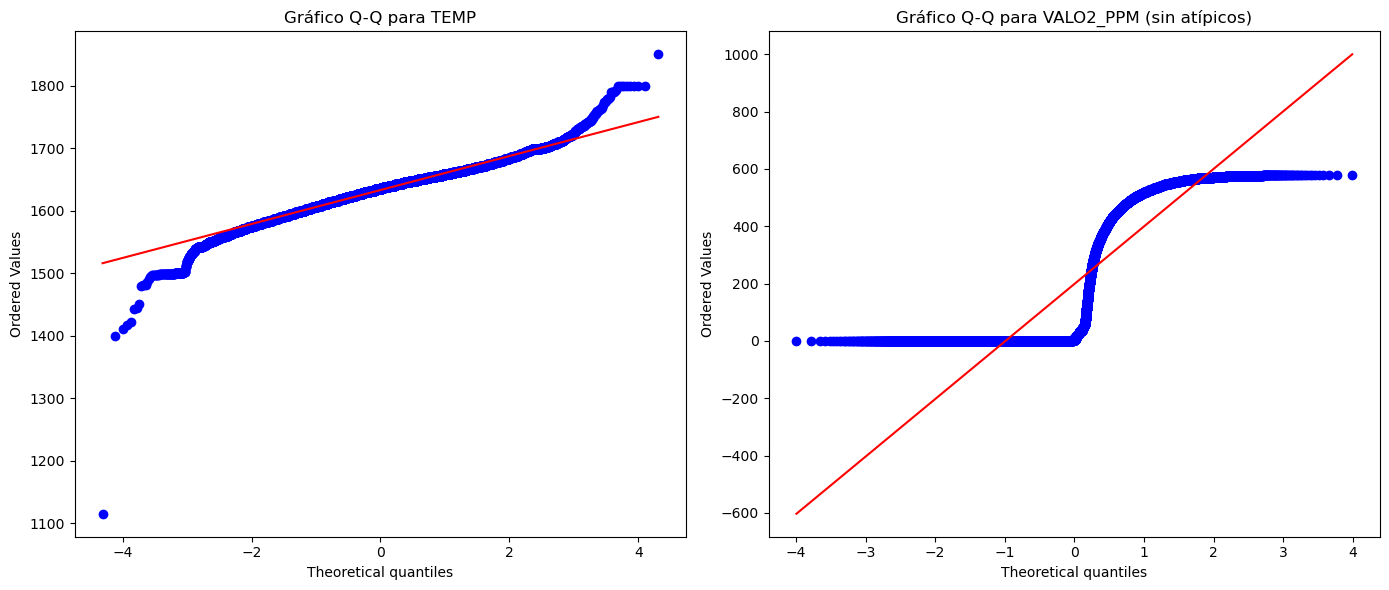

In [8]:
# Test de normalización
from scipy import stats
import matplotlib.pyplot as plt

# Test de Shapiro-Wilk para TEMP
shapiro_test_temp = stats.shapiro(df_eaf_temp['TEMP'])
print(f"Test de Shapiro-Wilk para TEMP: Estadístico={shapiro_test_temp.statistic}, p-valor={shapiro_test_temp.pvalue}")

# Test de Shapiro-Wilk para VALO2_PPM (sin valores atípicos)
shapiro_test_o2 = stats.shapiro(df_eaf_temp[df_eaf_temp['VALO2_PPM'] < 579]['VALO2_PPM'])
print(f"Test de Shapiro-Wilk para VALO2_PPM (sin valores atípicos): Estadístico={shapiro_test_o2.statistic}, p-valor={shapiro_test_o2.pvalue}")

# Interpretación de los resultados
alpha = 0.05
print("\nInterpretación (alpha=0.05):")
if shapiro_test_temp.pvalue > alpha:
    print("Para TEMP: La muestra parece Gaussiana (no se puede rechazar H0).")
else:
    print("Para TEMP: La muestra no parece Gaussiana (se rechaza H0).")

if shapiro_test_o2.pvalue > alpha:
    print("Para VALO2_PPM (sin atípicos): La muestra parece Gaussiana (no se puede rechazar H0).")
else:
    print("Para VALO2_PPM (sin atípicos): La muestra no parece Gaussiana (se rechaza H0).")

# Gráfico Q-Q para TEMP
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
stats.probplot(df_eaf_temp['TEMP'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para TEMP")

# Gráfico Q-Q para VALO2_PPM (sin valores atípicos)
plt.subplot(1, 2, 2)
stats.probplot(df_eaf_temp[df_eaf_temp['VALO2_PPM'] < 579]['VALO2_PPM'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para VALO2_PPM (sin atípicos)")

plt.tight_layout()
plt.show()


### Transformación de `VALO2_PPM`

Tienes toda la razón. Los Modelos de Mezclas Gaussianas (GMM) asumen que los datos de cada clúster siguen una distribución gaussiana. Si una de tus variables, como `VALO2_PPM`, no es normal, el rendimiento del modelo puede verse afectado.

La gráfica Q-Q que obtuvimos para `VALO2_PPM` muestra claramente que no sigue una distribución normal. Para solucionar esto, podemos aplicar una **transformación de cuantiles**. Esta técnica mapea la distribución de los datos a una distribución normal, que es exactamente lo que necesitamos.

A continuación, aplicaremos esta transformación y visualizaremos el resultado.

C:\Users\rprie\AppData\Local\Temp\ipykernel_16468\1510152193.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corrected['VALO2_PPM_normalized'].fillna(min_val - 1, inplace=True)


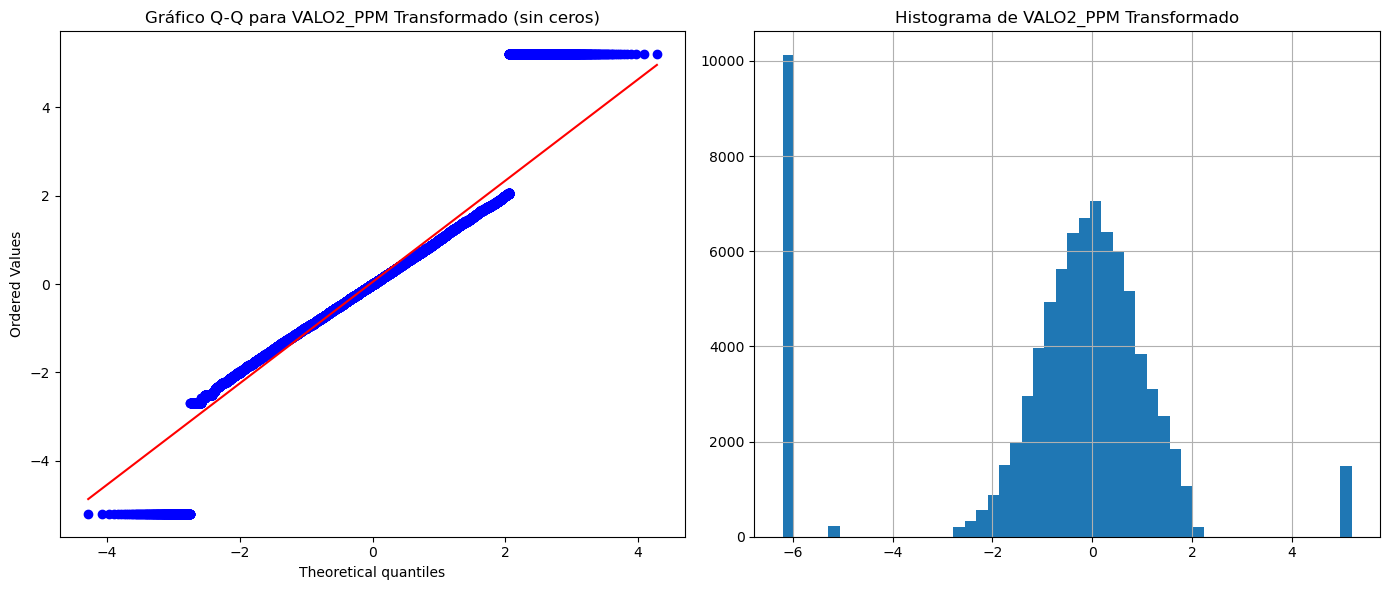

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_normalized
0,6F0020,2016-01-01 19:15:00,1650.0,1242.0,1.434306
1,6F0021,2016-01-01 20:05:00,1649.0,1160.0,1.179740
2,6F0021,2016-01-01 20:05:00,1649.0,1160.0,1.179740
3,6F0021,2016-01-01 20:03:00,1606.0,1152.0,1.154615
4,6F0022,2016-01-01 21:03:00,1636.0,947.0,0.378977


In [9]:
from sklearn.preprocessing import QuantileTransformer
import numpy as np

# Crear una copia para no modificar el DataFrame original
df_corrected = df_eaf_temp.copy()

# 1. Identificar los valores no nulos en VALO2_PPM
non_zero_mask = df_corrected['VALO2_PPM'] > 0
non_zero_values = df_corrected.loc[non_zero_mask, ['VALO2_PPM']]

# 2. Inicializar y aplicar el transformador solo a los valores no nulos
qt = QuantileTransformer(output_distribution='normal', random_state=42)
transformed_values = qt.fit_transform(non_zero_values)

# 3. Crear la nueva columna y asignar los valores transformados
# Inicializamos la columna con un valor bajo para representar los ceros
df_corrected['VALO2_PPM_normalized'] = np.nan
df_corrected.loc[non_zero_mask, 'VALO2_PPM_normalized'] = transformed_values
# Rellenamos los NaN (que eran los ceros) con un valor por debajo del mínimo para distinguirlos
min_val = df_corrected['VALO2_PPM_normalized'].min()
df_corrected['VALO2_PPM_normalized'].fillna(min_val - 1, inplace=True)


# Visualizar la nueva distribución
plt.figure(figsize=(14, 6))

# Gráfico Q-Q de los valores transformados (excluyendo los ceros originales)
plt.subplot(1, 2, 1)
stats.probplot(df_corrected.loc[non_zero_mask, 'VALO2_PPM_normalized'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para VALO2_PPM Transformado (sin ceros)")

# Histograma de toda la columna transformada
plt.subplot(1, 2, 2)
df_corrected['VALO2_PPM_normalized'].hist(bins=50)
plt.title("Histograma de VALO2_PPM Transformado")

plt.tight_layout()
plt.show()

# Mostrar las primeras filas
df_corrected.head()

In [10]:
# Revisar los que son VALO2_PPM <= -4
df_corrected[df_corrected['VALO2_PPM_normalized'] <= -4]

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_normalized
55,6F0037,2016-01-02 10:57:00,1609.0,0.0,-6.199338
59,6F0040,2016-01-02 13:27:00,1595.0,0.0,-6.199338
66,6F0042,2016-01-02 15:14:00,1636.0,0.0,-6.199338
74,6F0045,2016-01-02 17:55:00,1577.0,0.0,-6.199338
119,6F0060,2016-01-03 07:12:00,1591.0,0.0,-6.199338
...,...,...,...,...,...
85091,5F8439,2015-12-31 20:07:00,1644.0,0.0,-6.199338
85098,5F8441,2015-12-31 21:51:00,1563.0,0.0,-6.199338
85099,5F8441,2015-12-31 21:53:00,1653.0,0.0,-6.199338
85101,5F8441,2015-12-31 21:52:00,1603.0,0.0,-6.199338


In [11]:
df_corrected[df_corrected['VALO2_PPM'] == 0]

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_normalized
55,6F0037,2016-01-02 10:57:00,1609.0,0.0,-6.199338
59,6F0040,2016-01-02 13:27:00,1595.0,0.0,-6.199338
66,6F0042,2016-01-02 15:14:00,1636.0,0.0,-6.199338
74,6F0045,2016-01-02 17:55:00,1577.0,0.0,-6.199338
119,6F0060,2016-01-03 07:12:00,1591.0,0.0,-6.199338
...,...,...,...,...,...
85091,5F8439,2015-12-31 20:07:00,1644.0,0.0,-6.199338
85098,5F8441,2015-12-31 21:51:00,1563.0,0.0,-6.199338
85099,5F8441,2015-12-31 21:53:00,1653.0,0.0,-6.199338
85101,5F8441,2015-12-31 21:52:00,1603.0,0.0,-6.199338


In [12]:
# Revisar los que son VALO2_PPM >= 4
df_corrected[df_corrected['VALO2_PPM_normalized'] >= 4]

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_normalized
4819,6F1345,2016-02-26 22:22:00,1627.0,9999.0,5.199338
4827,6F1347,2016-02-27 00:03:00,1558.0,9999.0,5.199338
4832,6F1348,2016-02-27 00:52:00,1615.0,9999.0,5.199338
4854,6F1355,2016-02-27 06:44:00,1648.0,9999.0,5.199338
4856,6F1356,2016-02-27 07:10:00,1648.0,9999.0,5.199338
...,...,...,...,...,...
59496,8F4823,2018-07-06 02:04:00,1653.0,9999.0,5.199338
59522,8F4844,2018-07-06 19:57:00,1620.0,9999.0,5.199338
59587,8F4869,2018-07-07 15:36:00,1652.0,9999.0,5.199338
59789,8F4986,2018-07-11 21:56:00,1590.0,9999.0,5.199338


### Estrategia Final: Separar la Información de `VALO2_PPM`

El problema principal es que `VALO2_PPM` contiene dos tipos de información: si se midió oxígeno (`>0`) y la cantidad medida. Forzar todo en una sola distribución normal no es lo ideal.

La mejor estrategia es separar estas dos ideas en dos características distintas para que el modelo pueda aprender de ambas:

1.  **`VALO2_PPM_no_cero`**: Una nueva columna **binaria** que será `1` si `VALO2_PPM` es mayor que cero y `0` si es igual a cero. Esto le dice al modelo de forma explícita si hubo o no una medición de oxígeno.
2.  **`VALO2_PPM_transformado`**: Una nueva columna donde aplicaremos la **transformación de cuantiles solo a los valores que eran mayores que cero**. Los valores que originalmente eran `0` se mantendrán como `0`.

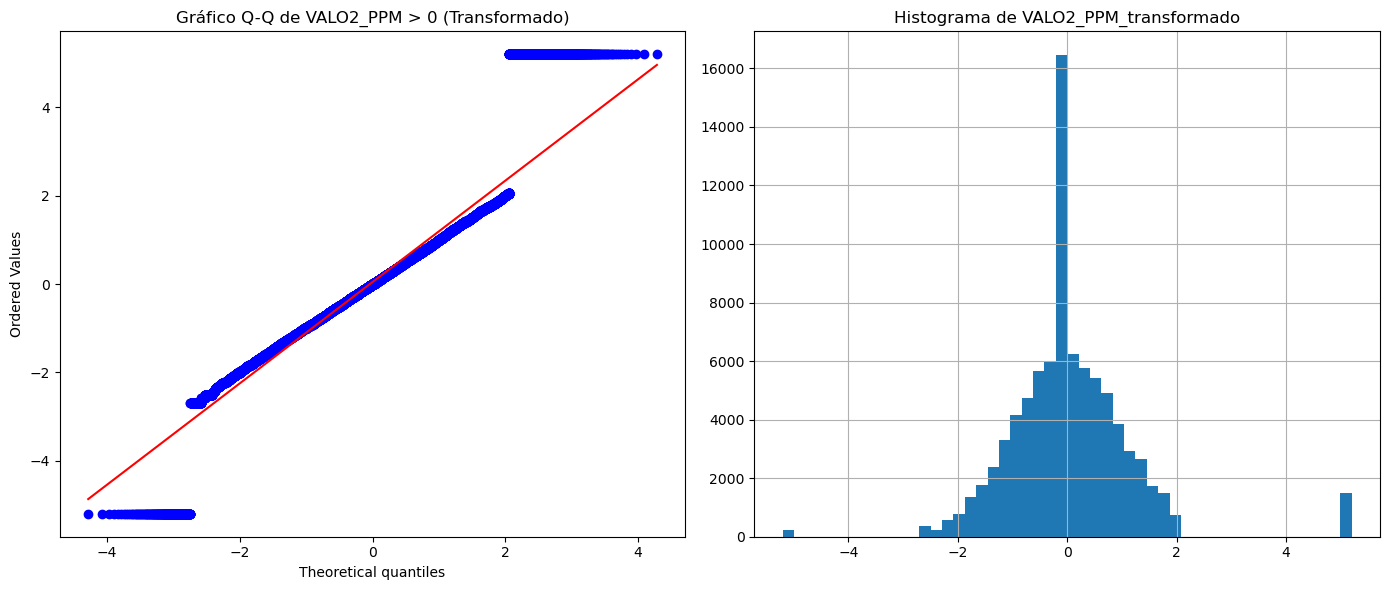

,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_no_cero,VALO2_PPM_transformado
0,2016-01-01 19:15:00,1650.0,1242.0,1,1.434306
1,2016-01-01 20:05:00,1649.0,1160.0,1,1.179740
2,2016-01-01 20:05:00,1649.0,1160.0,1,1.179740
3,2016-01-01 20:03:00,1606.0,1152.0,1,1.154615
4,2016-01-01 21:03:00,1636.0,947.0,1,0.378977


In [13]:
# Crear el DataFrame final para el modelo
df_final = df_eaf_temp.copy()

# 1. Crear la característica binaria
df_final['VALO2_PPM_no_cero'] = (df_final['VALO2_PPM'] > 0).astype(int)

# 2. Transformar solo los valores no nulos
non_zero_mask_final = df_final['VALO2_PPM'] > 0
non_zero_values_final = df_final.loc[non_zero_mask_final, ['VALO2_PPM']]

qt_final = QuantileTransformer(output_distribution='normal', random_state=42)
transformed_values_final = qt_final.fit_transform(non_zero_values_final)

# 3. Crear la columna transformada, manteniendo los ceros como 0
df_final['VALO2_PPM_transformado'] = 0.0
df_final.loc[non_zero_mask_final, 'VALO2_PPM_transformado'] = transformed_values_final

# Visualizar la distribución final
plt.figure(figsize=(14, 6))

# Gráfico Q-Q de los valores transformados (los que no eran cero)
plt.subplot(1, 2, 1)
stats.probplot(df_final.loc[non_zero_mask_final, 'VALO2_PPM_transformado'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q de VALO2_PPM > 0 (Transformado)")

# Histograma de la columna final (con ceros)
plt.subplot(1, 2, 2)
df_final['VALO2_PPM_transformado'].hist(bins=50)
plt.title("Histograma de VALO2_PPM_transformado")

plt.tight_layout()
plt.show()

# Mostrar las columnas relevantes del DataFrame final
df_final[['DATETIME', 'TEMP', 'VALO2_PPM', 'VALO2_PPM_no_cero', 'VALO2_PPM_transformado']].head()

In [14]:
df_final[df_final['VALO2_PPM'] >= 9999]

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_no_cero,VALO2_PPM_transformado
4819,6F1345,2016-02-26 22:22:00,1627.0,9999.0,1,5.199338
4827,6F1347,2016-02-27 00:03:00,1558.0,9999.0,1,5.199338
4832,6F1348,2016-02-27 00:52:00,1615.0,9999.0,1,5.199338
4854,6F1355,2016-02-27 06:44:00,1648.0,9999.0,1,5.199338
4856,6F1356,2016-02-27 07:10:00,1648.0,9999.0,1,5.199338
...,...,...,...,...,...,...
59496,8F4823,2018-07-06 02:04:00,1653.0,9999.0,1,5.199338
59522,8F4844,2018-07-06 19:57:00,1620.0,9999.0,1,5.199338
59587,8F4869,2018-07-07 15:36:00,1652.0,9999.0,1,5.199338
59789,8F4986,2018-07-11 21:56:00,1590.0,9999.0,1,5.199338


### Normalización de la variable `TEMP`

De manera similar a como tratamos `VALO2_PPM`, la variable `TEMP` también se beneficiará de una normalización para que se ajuste mejor a los supuestos de los modelos de Mezclas Gaussianas. Aunque su distribución original no es tan problemática como la de `VALO2_PPM`, aplicar una transformación de cuantiles nos asegurará que siga una distribución normal, mejorando potencialmente el rendimiento del modelo de clustering.

A continuación, aplicaremos esta transformación y visualizaremos el resultado.

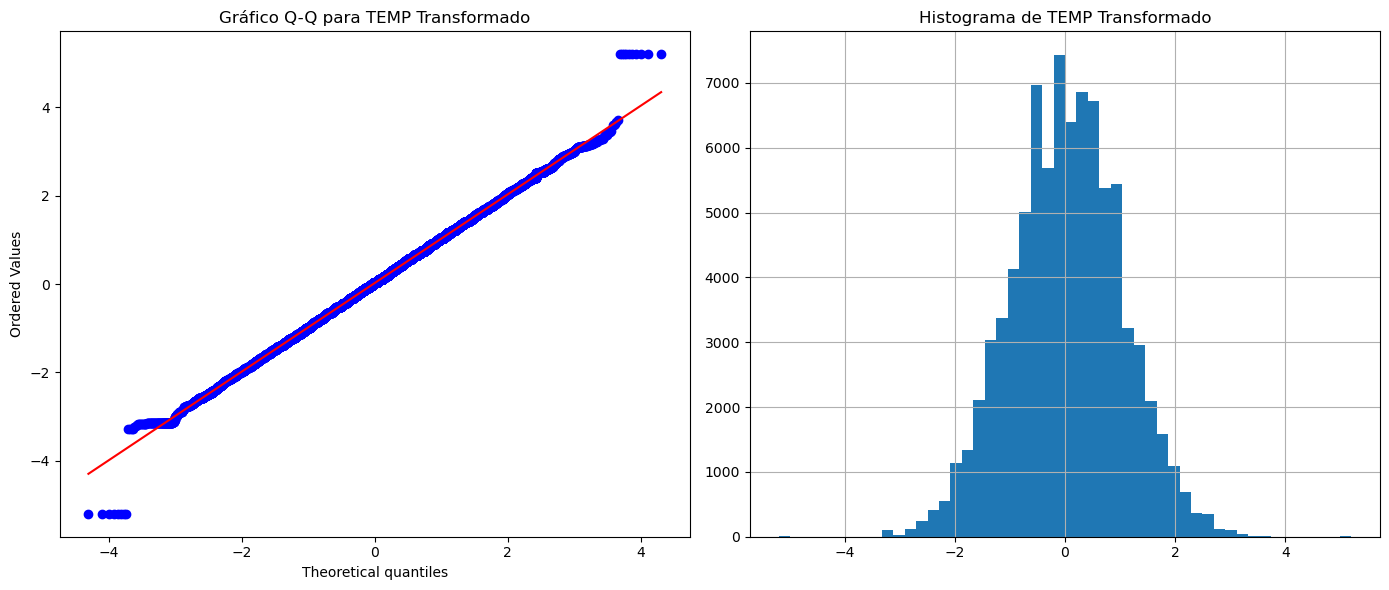

,DATETIME,TEMP,TEMP_transformado,VALO2_PPM_no_cero,VALO2_PPM_transformado
0,2016-01-01 19:15:00,1650.0,0.658043,1,1.434306
1,2016-01-01 20:05:00,1649.0,0.601439,1,1.179740
2,2016-01-01 20:05:00,1649.0,0.601439,1,1.179740
3,2016-01-01 20:03:00,1606.0,-0.993800,1,1.154615
4,2016-01-01 21:03:00,1636.0,0.048948,1,0.378977


In [15]:
# Aplicar la transformación de cuantiles a la columna TEMP
qt_temp = QuantileTransformer(output_distribution='normal', random_state=42)
df_final['TEMP_transformado'] = qt_temp.fit_transform(df_final[['TEMP']])

# Visualizar la distribución transformada
plt.figure(figsize=(14, 6))

# Gráfico Q-Q
plt.subplot(1, 2, 1)
stats.probplot(df_final['TEMP_transformado'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para TEMP Transformado")

# Histograma
plt.subplot(1, 2, 2)
df_final['TEMP_transformado'].hist(bins=50)
plt.title("Histograma de TEMP Transformado")

plt.tight_layout()
plt.show()

# Mostrar las columnas relevantes del DataFrame final
df_final[['DATETIME', 'TEMP', 'TEMP_transformado', 'VALO2_PPM_no_cero', 'VALO2_PPM_transformado']].head()

In [16]:
df_final[df_final['TEMP_transformado'] <= -4]

,HEATID,DATETIME,TEMP,VALO2_PPM,VALO2_PPM_no_cero,VALO2_PPM_transformado,TEMP_transformado
3025,6F0836,2016-02-05 15:38:00,1450.0,400.0,1,-1.569627,-5.199338
4010,6F1105,2016-02-16 06:02:00,1115.0,1085.0,1,0.895780,-5.199338
44281,7F5925,2017-08-31 18:44:00,1443.0,0.0,0,0.000000,-5.199338
47027,7F6689,2017-10-05 20:47:00,1400.0,50.0,1,-2.016401,-5.199338
50255,7F7682,2017-11-10 23:35:00,1417.0,9999.0,1,5.199338,-5.199338
50262,7F7683,2017-11-11 00:23:00,1444.0,9999.0,1,5.199338,-5.199338
57149,8F3492,2018-05-15 07:52:00,1421.0,9999.0,1,5.199338,-5.199338
59581,8F4864,2018-07-07 11:39:00,1411.0,0.0,0,0.000000,-5.199338


In [17]:
# Guardar resultados
df_final.to_csv('eaf_temp_preprocessed.csv', index=False)

Con esto hecho, tenemos el df_eaf_temp esta con datos normalizados, listos para ser usados.

# Exploracion de basket_charged

In [18]:
df_basket_charged = pd.read_csv('basket_charged.csv')
df_basket_charged

C:\Users\rprie\AppData\Local\Temp\ipykernel_16468\687798876.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basket_charged = pd.read_csv('basket_charged.csv')


,MAT_CODE,MAT_DEC,HEATID,DATETIME,CHARGED_AMOUNT
0,205051,3A,6F0020,2016-01-01 18:51:00,54071
1,205051,3A,6F0020,2016-01-01 19:24:00,75240
2,360258,In-house produced lime,6F0020,2016-01-01 18:33:00,2502
3,205051,3A,6F0020,2016-01-01 18:51:00,4773
4,360258,In-house produced lime,6F0020,2016-01-01 18:51:00,2500
...,...,...,...,...,...
137680,201010,Steelmaking iron,5F8442,2015-12-31 22:14:00,19350
137681,205051,3A,5F8442,2015-12-31 22:14:00,7390
137682,360258,In-house produced lime,5F8442,2015-12-31 22:14:00,2253
137683,360258,In-house produced lime,5F8442,2015-12-31 22:01:00,2251


In [19]:
df_basket_charged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137685 entries, 0 to 137684
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   MAT_CODE        137685 non-null  int64 
 1   MAT_DEC         137685 non-null  object
 2   HEATID          137685 non-null  object
 3   DATETIME        137685 non-null  object
 4   CHARGED_AMOUNT  137685 non-null  object
dtypes: int64(1), object(4)
memory usage: 5.3+ MB


In [20]:
# Cambiar datetime
df_basket_charged['DATETIME'] = pd.to_datetime(df_basket_charged['DATETIME'])

# Establecer CHARGED_AMOUNT A int
df_basket_charged['CHARGED_AMOUNT'] = pd.to_numeric(df_basket_charged['CHARGED_AMOUNT'].str.replace(',', '.', regex=False), errors='coerce').fillna(0).astype(int)

In [21]:
df_basket_charged.head()

,MAT_CODE,MAT_DEC,HEATID,DATETIME,CHARGED_AMOUNT
0,205051,3A,6F0020,2016-01-01 18:51:00,54071
1,205051,3A,6F0020,2016-01-01 19:24:00,75240
2,360258,In-house produced lime,6F0020,2016-01-01 18:33:00,2502
3,205051,3A,6F0020,2016-01-01 18:51:00,4773
4,360258,In-house produced lime,6F0020,2016-01-01 18:51:00,2500


In [22]:
# Revisar cuantos MAT_DEC hay
df_basket_charged['MAT_DEC'].unique()

array(['3A', 'In-house produced lime', 'Coke 10-30 mm', '16A',
       'Liquid scrap', 'Steelmaking iron', 'Secondary aluminum AV 87',
       'SIMP-RM', 'B11', '26A', 'Steel scrap G/B 25A', 'Ferrous scrap 6A',
       'Mo pellets', 'Artificial graphite 0.1-2.5 mm', 'Ladle scrap',
       '25A1', 'FOMI B2', 'Magma', 'Scrap 3B22', '25A', 'B68', 'FOMI',
       'Vanadium alloy', 'Mo material briquet', 'Hot briquet iron',
       'FMN 78 GOST4755-91 class 4', 'Aluminum briquet',
       'Separation waste 3A', 'Lime', '3ACh', 'Scrap G/B 25AS',
       'Scrap G/B 25A', '3B23', 'Briquets 6A', 'FeCr025', 'Magma-P',
       'Scrap B23', 'Iron scrap', 'Separation scrap', 'Flux FIM',
       'Lime, grade 2', '3A (shop pipe waste)', 'Shram 75', 'MnSi17A',
       'FeSi65-4', 'High-carbon ferrochromium'], dtype=object)

<Axes: xlabel='MAT_DEC'>

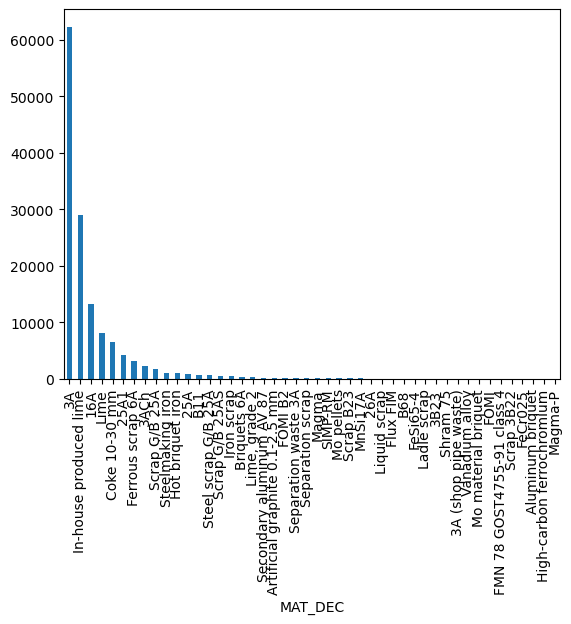

In [23]:
# Graficar cantidades de MAT_DEC
df_basket_charged['MAT_DEC'].value_counts().plot(kind='bar')

In [86]:
df_basket_charged.to_csv('df_basket_charged.csv', index=False)

Creo que no hay mucho que explorar en estos datos, realmente podemos decir que es un diccionario que quiza se relaciona con lo demas pero no hay algo que realmente se pueda explorar. Mas adelante quiza lo tendre que usar para un analisis de correlación.

# eaf_added_materials.csv, analisis de datos

In [24]:
df_eaf_added_materials = pd.read_csv('eaf_added_materials.csv')
df_eaf_added_materials

,MAT_CODE,MAT_DEC,HEATID,DATETIME,CHARGE_AMOUNT
0,705046,FOMI B2,6F0020,2016-01-01 19:10:00,723
1,203068,Coke 10-30 mm,6F0020,2016-01-01 19:10:00,517
2,705043,Magma,6F0020,2016-01-01 19:10:00,705
3,203068,Coke 10-30 mm,6F0021,2016-01-01 20:00:00,517
4,705043,Magma,6F0021,2016-01-01 20:00:00,704
...,...,...,...,...,...
79939,203068,Coke 10-30 mm,5F8441,2015-12-31 21:45:00,609
79940,705043,Magma,5F8441,2015-12-31 21:45:00,505
79941,705046,FOMI B2,5F8441,2015-12-31 21:45:00,525
79942,705043,Magma,5F8442,2015-12-31 22:31:00,505


In [25]:
df_eaf_added_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79944 entries, 0 to 79943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAT_CODE       79944 non-null  int64 
 1   MAT_DEC        79944 non-null  object
 2   HEATID         79944 non-null  object
 3   DATETIME       79944 non-null  object
 4   CHARGE_AMOUNT  79944 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [26]:
# Cambiar datetime
df_eaf_added_materials['DATETIME'] = pd.to_datetime(df_eaf_added_materials['DATETIME'])

# Establecer CHARGE_AMOUNT A int
df_eaf_added_materials['CHARGE_AMOUNT'] = pd.to_numeric(df_eaf_added_materials['CHARGE_AMOUNT'].str.replace(',', '.', regex=False), errors='coerce').fillna(0).astype(int)

In [27]:
df_eaf_added_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79944 entries, 0 to 79943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   MAT_CODE       79944 non-null  int64         
 1   MAT_DEC        79944 non-null  object        
 2   HEATID         79944 non-null  object        
 3   DATETIME       79944 non-null  datetime64[ns]
 4   CHARGE_AMOUNT  79944 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(2)
memory usage: 2.7+ MB


In [28]:
df_eaf_added_materials['MAT_DEC'].unique()

array(['FOMI B2', 'Coke 10-30 mm', 'Magma', 'Secondary aluminum AV 87',
       'SIMP-RM', 'In-house produced lime', 'Liquid scrap',
       'Steel scrap G/B 25A', 'Steelmaking iron', 'MnSi17A', 'FOMI',
       'Artificial graphite 0.1-2.5 mm', 'FeSi65-4', '25A1',
       'KRS-65 briquets', 'Aluminum briquet', 'B68', 'Lime', 'Anthracite',
       'Scrap G/B 25A', '3ACh', 'Briquet BMK-60', 'Flux FM-2-1',
       'FeSi 45', 'Hot briquet iron', 'Separation waste 3A',
       'Ferrous scrap 6A', '25A', 'KShU 75', 'Magma-P', 'Scrap G/B 25AS',
       'FeCr 850A', 'Dolomite', 'Flux FIM', 'Mo pellets', 'FGM material',
       'CCM 03-10mm', '3A', 'KRS-65', 'CCM 30-60 mm', 'Lime, grade 2',
       'Magnesite brick scrap', 'FeCr025', 'Pellets AV-87', 'AShM 75',
       'High-carbon ferrochromium', 'FMN 78 GOST4755-91 class 4'],
      dtype=object)

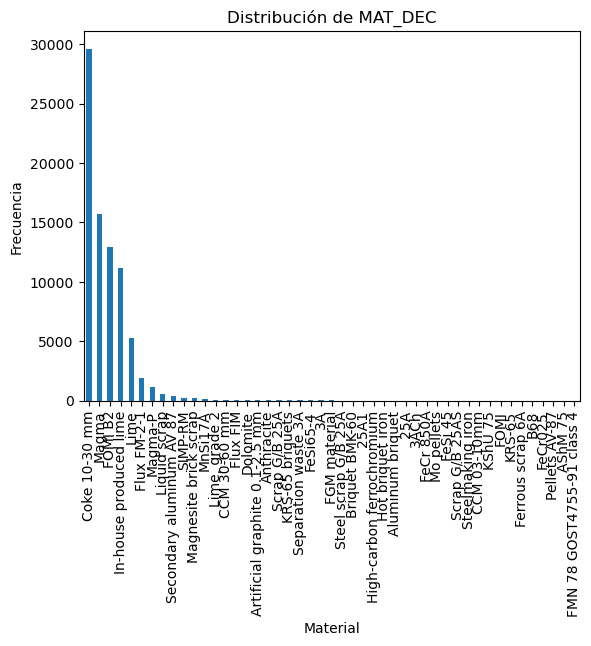

In [29]:
# Graficar MAT_DEC
import matplotlib.pyplot as plt

df_eaf_added_materials['MAT_DEC'].value_counts().plot(kind='bar')
plt.title('Distribución de MAT_DEC')
plt.xlabel('Material')
plt.ylabel('Frecuencia')
plt.show()

In [87]:
df_eaf_added_materials.to_csv('eaf_added_materials_preprocessed.csv', index=False)

# lf_added_materials.csv, analisis de datos

In [30]:
df_lf_added_materials = pd.read_csv('lf_added_materials.csv')
df_lf_added_materials.head()

,FILTER_KEY_DATE,HEATID,MAT_CODE,DESCR,MAT_CHARGED
0,2016-01-01 19:50:00,6F0020,205065,ATF-75,87
1,2016-01-01 19:47:00,6F0020,205065,ATF-75,89
2,2016-01-01 19:36:00,6F0020,205069,Secondary aluminum AV 87,80
3,2016-01-01 19:50:00,6F0020,360258,In-house produced lime,242
4,2016-01-01 19:47:00,6F0020,360258,In-house produced lime,243


In [31]:
df_lf_added_materials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302445 entries, 0 to 302444
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   FILTER_KEY_DATE  302445 non-null  object
 1   HEATID           302445 non-null  object
 2   MAT_CODE         302445 non-null  int64 
 3   DESCR            302445 non-null  object
 4   MAT_CHARGED      302445 non-null  object
dtypes: int64(1), object(4)
memory usage: 11.5+ MB


In [32]:
# Datetime
df_lf_added_materials['FILTER_KEY_DATE'] = pd.to_datetime(df_lf_added_materials['FILTER_KEY_DATE'])

In [88]:
df_lf_added_materials.to_csv('lf_added_materials_preprocessed.csv', index=False)

# eaf_transformer.csv, analisis de datos

In [33]:
df_eaf_transformer = pd.read_csv('eaf_transformer.csv')
df_eaf_transformer.head()

,TAP,HEATID,STARTTIME,DURATION,MW
0,11,6F0020,2016-01-01 18:35:00,00: 29,"0,5"
1,17,6F0020,2016-01-01 19:04:00,10: 40,16
2,17,6F0020,2016-01-01 18:55:00,03: 00,11
3,17,6F0020,2016-01-01 18:37:00,13: 20,"16,75"
4,17,6F0020,2016-01-01 18:36:00,00: 40,"0,75"


In [34]:
# Datetime
df_eaf_transformer['STARTTIME'] = pd.to_datetime(df_eaf_transformer['STARTTIME'])

In [35]:
# Change MW from string to numeric
df_eaf_transformer['MW'] = pd.to_numeric(df_eaf_transformer['MW'].str.replace(',', '.', regex=False), errors='coerce')

## Revisar normalidad de MW

C:\Users\rprie\AppData\Local\Temp\ipykernel_16468\3572049505.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_corrected['MW_normalized'].fillna(min_val - 1, inplace=True)


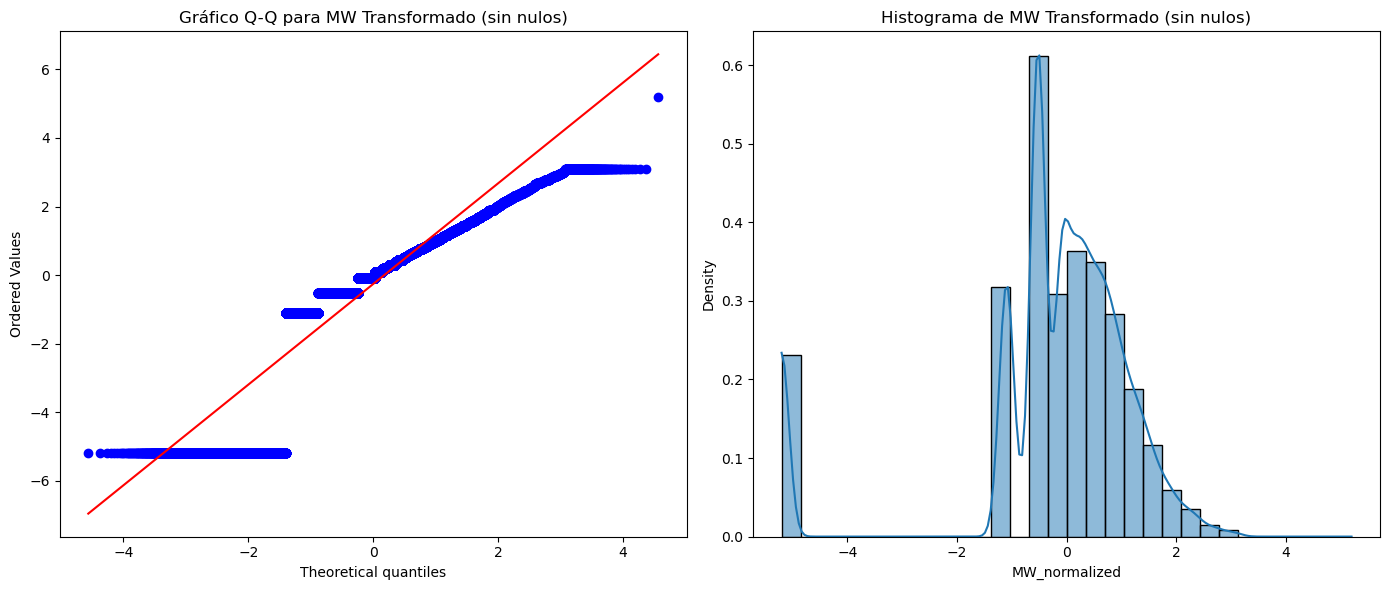

In [36]:
# Revisar normalidad de MW
import seaborn as sns
df_corrected = df_eaf_transformer.copy()

non_zero_mask = df_corrected['MW'].notnull()
non_zero_values = df_corrected.loc[non_zero_mask, ['MW']]

qt = QuantileTransformer(output_distribution='normal', random_state=42)
transformed_values = qt.fit_transform(non_zero_values)

df_corrected['MW_normalized'] = np.nan
df_corrected.loc[non_zero_mask, 'MW_normalized'] = transformed_values
min_val = df_corrected['MW_normalized'].min()
df_corrected['MW_normalized'].fillna(min_val - 1, inplace=True)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(df_corrected.loc[non_zero_mask, 'MW_normalized'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para MW Transformado (sin nulos)")

# Histograma de la variable transformada
plt.subplot(1, 2, 2)
sns.histplot(df_corrected.loc[non_zero_mask, 'MW_normalized'], kde=True, stat="density", bins=30)
plt.title("Histograma de MW Transformado (sin nulos)")

plt.tight_layout()
plt.show()

In [37]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una copia del DataFrame para trabajar de forma segura
df_processed_mw = df_eaf_transformer.copy()

# Identificar las filas que no tienen valores nulos en 'MW'
not_null_mask = df_processed_mw['MW'].notnull()
mw_values_to_scale = df_processed_mw.loc[not_null_mask, ['MW']]

# Inicializar y aplicar el StandardScaler
scaler = StandardScaler()
scaled_values = scaler.fit_transform(mw_values_to_scale)

# Crear la nueva columna 'MW_scaled' y asignar los valores estandarizados
df_processed_mw['MW_scaled'] = np.nan
df_processed_mw.loc[not_null_mask, 'MW_scaled'] = scaled_values


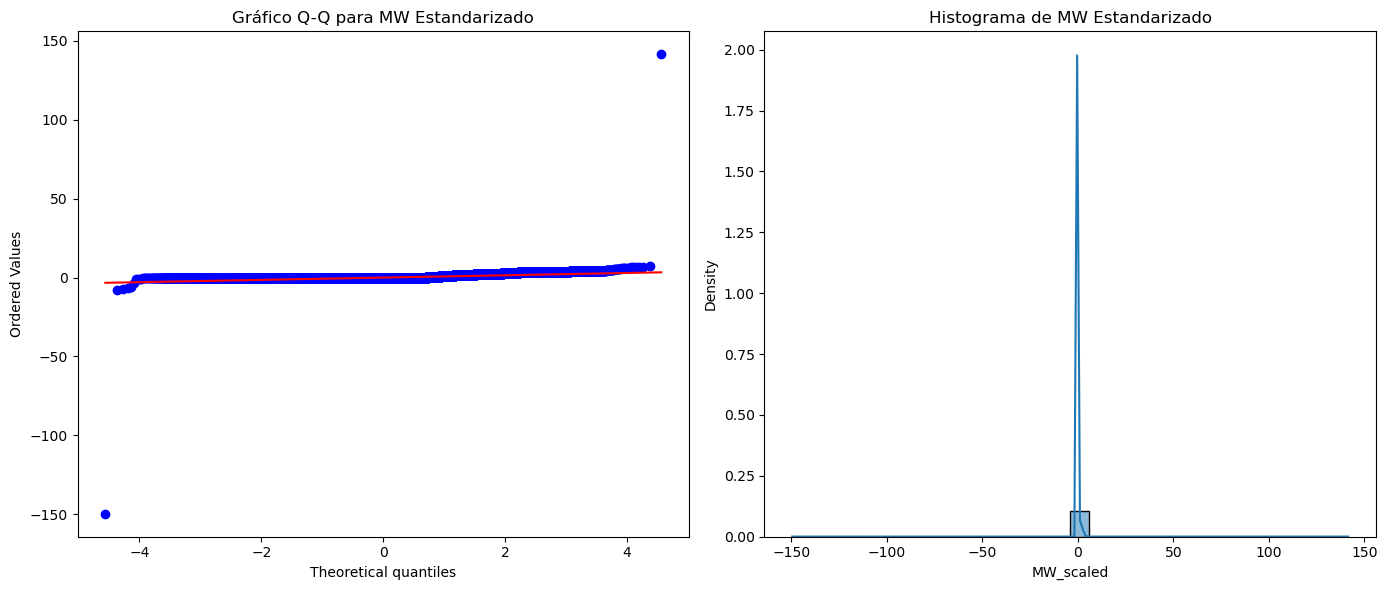

In [38]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
stats.probplot(df_processed_mw['MW_scaled'].dropna(), dist="norm", plot=plt)
plt.title("Gráfico Q-Q para MW Estandarizado")

# Histograma de la variable estandarizada
plt.subplot(1, 2, 2)
sns.histplot(df_processed_mw['MW_scaled'].dropna(), kde=True, stat="density", bins=30)
plt.title("Histograma de MW Estandarizado")

plt.tight_layout()
plt.show()


In [90]:
df_processed_mw.to_csv('eaf_transformer_preprocessed.csv', index=False)

# inj_mat.csv, analisis de datos

In [39]:
df_inj_mat = pd.read_csv('inj_mat.csv')
df_inj_mat.head()

,REVTIME,INJ_AMOUNT_CARBON,INJ_FLOW_CARBON,HEATID
0,"2016-01-01 18:31:45,972","0,00","0,000",6F0020
1,"2016-01-01 18:31:55,925","0,00","0,000",6F0020
2,"2016-01-01 18:32:55,956","0,00","0,000",6F0020
3,"2016-01-01 18:33:05,941","0,00","0,000",6F0020
4,"2016-01-01 18:35:36,066","0,00","0,000",6F0020


In [40]:
df_inj_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011646 entries, 0 to 4011645
Data columns (total 4 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   REVTIME            object
 1   INJ_AMOUNT_CARBON  object
 2   INJ_FLOW_CARBON    object
 3   HEATID             object
dtypes: object(4)
memory usage: 122.4+ MB


Son bastantes filas, tendre que ver que tanto influye esto...

In [41]:
# Datetime (REVTIME)
df_inj_mat['REVTIME'] = pd.to_datetime(df_inj_mat['REVTIME'])


C:\Users\rprie\AppData\Local\Temp\ipykernel_16468\1370075822.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_inj_mat['REVTIME'] = pd.to_datetime(df_inj_mat['REVTIME'])


In [42]:
# Guardar df con datetimes
df_inj_mat.to_csv('inj_mat_converted.csv', index=False)

In [43]:
# Convertir los INJ_AMOUNT_CARBON a numérico
df_inj_mat['INJ_AMOUNT_CARBON'] = pd.to_numeric(df_inj_mat['INJ_AMOUNT_CARBON'].str.replace(',', '.', regex=False), errors='coerce')

# Convertir los INJ_FLOW_CARBON a numérico
df_inj_mat['INJ_FLOW_CARBON'] = pd.to_numeric(df_inj_mat['INJ_FLOW_CARBON'].str.replace(',', '.', regex=False), errors='coerce')

In [44]:
df_inj_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4011646 entries, 0 to 4011645
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   REVTIME            datetime64[ns]
 1   INJ_AMOUNT_CARBON  float64       
 2   INJ_FLOW_CARBON    float64       
 3   HEATID             object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 122.4+ MB


In [45]:
df_inj_mat.head()

,REVTIME,INJ_AMOUNT_CARBON,INJ_FLOW_CARBON,HEATID
0,2016-01-01 18:31:45,0.0,0.0,6F0020
1,2016-01-01 18:31:55,0.0,0.0,6F0020
2,2016-01-01 18:32:55,0.0,0.0,6F0020
3,2016-01-01 18:33:05,0.0,0.0,6F0020
4,2016-01-01 18:35:36,0.0,0.0,6F0020


In [46]:
# Guardar nuevamente
df_inj_mat.to_csv('inj_mat_converted.csv', index=False)

# eaf_gaslance_mat.csv, analisis de datos

In [72]:
df_eaf_gaslance_mat = pd.read_csv('eaf_gaslance_mat.csv')
df_eaf_gaslance_mat.head()

,REVTIME,O2_AMOUNT,GAS_AMOUNT,O2_FLOW,GAS_FLOW,HEATID
0,"2016-01-01 18:31:46,003","0,00","0,00","0,000","0,000",6F0020
1,"2016-01-01 18:31:55,925","4555,00","548,00","0,000","0,000",6F0020
2,"2016-01-01 18:32:55,972","0,00","0,00","0,000","0,000",6F0020
3,"2016-01-01 18:33:05,956","0,00","0,00","2628,000","0,000",6F0020
4,"2016-01-01 18:33:16,019","1,00","0,00","1077,000","164,000",6F0020


In [73]:
# Datetime (REVTIME)
df_eaf_gaslance_mat['REVTIME'] = pd.to_datetime(df_eaf_gaslance_mat['REVTIME'])

C:\Users\rprie\AppData\Local\Temp\ipykernel_16468\2516248003.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eaf_gaslance_mat['REVTIME'] = pd.to_datetime(df_eaf_gaslance_mat['REVTIME'])


In [74]:
df_eaf_gaslance_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748194 entries, 0 to 5748193
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   REVTIME     datetime64[ns]
 1   O2_AMOUNT   object        
 2   GAS_AMOUNT  object        
 3   O2_FLOW     object        
 4   GAS_FLOW    object        
 5   HEATID      object        
dtypes: datetime64[ns](1), object(5)
memory usage: 263.1+ MB


In [76]:
df_eaf_gaslance_mat

,REVTIME,O2_AMOUNT,GAS_AMOUNT,O2_FLOW,GAS_FLOW,HEATID
0,2016-01-01 18:31:46,"0,00","0,00","0,000","0,000",6F0020
1,2016-01-01 18:31:55,"4555,00","548,00","0,000","0,000",6F0020
2,2016-01-01 18:32:55,"0,00","0,00","0,000","0,000",6F0020
3,2016-01-01 18:33:05,"0,00","0,00","2628,000","0,000",6F0020
4,2016-01-01 18:33:16,"1,00","0,00","1077,000","164,000",6F0020
...,...,...,...,...,...,...
5748189,2015-12-31 22:40:26,"3888,00","537,00","0,000","0,000",5F8442
5748190,2015-12-31 22:40:36,"3893,00","537,00","0,000","0,000",5F8442
5748191,2015-12-31 22:40:46,"3898,00","537,00","1817,000","83,000",5F8442
5748192,2015-12-31 22:40:56,"3903,00","537,00","1971,000","84,000",5F8442


In [80]:
df_eaf_gaslance_mat['GAS_AMOUNT'] = pd.to_numeric(df_eaf_gaslance_mat['GAS_AMOUNT'].str.replace(',', '.', regex=True), errors='coerce')
df_eaf_gaslance_mat['O2_FLOW'] = pd.to_numeric(df_eaf_gaslance_mat['O2_FLOW'].str.replace(',', '.', regex=True), errors='coerce')
df_eaf_gaslance_mat['GAS_FLOW'] = pd.to_numeric(df_eaf_gaslance_mat['GAS_FLOW'].str.replace(',', '.', regex=True), errors='coerce')

In [85]:
df_eaf_gaslance_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748194 entries, 0 to 5748193
Data columns (total 6 columns):
 #   Column      Dtype         
---  ------      -----         
 0   REVTIME     datetime64[ns]
 1   O2_AMOUNT   float64       
 2   GAS_AMOUNT  float64       
 3   O2_FLOW     float64       
 4   GAS_FLOW    float64       
 5   HEATID      object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 263.1+ MB


In [83]:
df_eaf_gaslance_mat.to_csv('eaf_gaslance_mat_converted.csv', index=False)

# ladle_tapping.csv, analisis de datos

In [51]:
df_ladle_tapping = pd.read_csv('ladle_tapping.csv')
df_ladle_tapping.head()

,HEATID,MAT_CODE,MAT_DEC,CHARGE_AMOUNT,DATETIME
0,6F0020,202007,MnSi17A,2067,2016-01-01 19:17:00
1,6F0020,203068,Coke 10-30 mm,237,2016-01-01 19:17:00
2,6F0020,203085,SIMP-RM,40,2016-01-01 19:24:00
3,6F0020,205069,Secondary aluminum AV 87,100,2016-01-01 19:24:00
4,6F0020,360258,In-house produced lime,414,2016-01-01 19:17:00


In [52]:
df_ladle_tapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115873 entries, 0 to 115872
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   HEATID         115873 non-null  object
 1   MAT_CODE       115873 non-null  int64 
 2   MAT_DEC        115873 non-null  object
 3   CHARGE_AMOUNT  115873 non-null  object
 4   DATETIME       115563 non-null  object
dtypes: int64(1), object(4)
memory usage: 4.4+ MB


In [53]:
df_ladle_tapping['CHARGE_AMOUNT'] = pd.to_numeric(df_ladle_tapping['CHARGE_AMOUNT'], errors='coerce')
df_ladle_tapping['DATETIME'] = pd.to_datetime(df_ladle_tapping['DATETIME'], errors='coerce')

df_ladle_tapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115873 entries, 0 to 115872
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   HEATID         115873 non-null  object        
 1   MAT_CODE       115873 non-null  int64         
 2   MAT_DEC        115873 non-null  object        
 3   CHARGE_AMOUNT  115805 non-null  float64       
 4   DATETIME       115563 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 4.4+ MB


In [54]:
df_ladle_tapping.to_csv('ladle_tapping_converted.csv', index=False)

# lf_initial_chemical_measurements.csv, analisis de datos

In [55]:
df_lf_initial_chemical_measurements = pd.read_csv('lf_initial_chemical_measurements.csv')
df_lf_initial_chemical_measurements.head()

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI
0,6F0020,1,2016-01-01 19:59:00,"0,2312","0,2449","1,2652","0,0076","0,0147","0,2072","0,0726","0,0194","0,1323"
1,6F0021,1,2016-01-01 20:59:00,"0,2507","0,2687","1,2916","0,0055","0,0204","0,2045","0,0747","0,0206","0,1326"
2,6F0022,1,2016-01-01 21:53:00,"0,234","0,2276","1,1963","0,0056","0,0193","0,1898","0,0695","0,0203","0,1218"
3,6F0023,1,2016-01-01 23:27:00,"0,3652","0,2154","0,7934","0,0078","0,025","0,2154","0,0956","0,0342","0,2051"
4,6F0024,1,2016-01-02 00:32:00,"0,374","0,1932","0,7948","0,0071","0,0202","0,2191","0,1029","0,0267","0,1534"


In [56]:
df_lf_initial_chemical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20827 entries, 0 to 20826
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HEATID       20827 non-null  object
 1   POSITIONROW  20827 non-null  int64 
 2   DATETIME     20827 non-null  object
 3   VALC         20827 non-null  object
 4   VALSI        20827 non-null  object
 5   VALMN        20827 non-null  object
 6   VALP         20827 non-null  object
 7   VALS         20827 non-null  object
 8   VALCU        20827 non-null  object
 9   VALCR        20827 non-null  object
 10  VALMO        20827 non-null  object
 11  VALNI        20827 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.9+ MB


In [57]:
# Define the columns that need to be converted to numeric
numeric_cols = ['VALC', 'VALSI', 'VALMN', 'VALP', 'VALS', 'VALCU', 'VALNI', 'VALCR', 'VALMO']

# For each column, replace the comma with a period and then convert to a numeric type
for col in numeric_cols:
    df_lf_initial_chemical_measurements[col] = pd.to_numeric(df_lf_initial_chemical_measurements[col].str.replace(',', '.', regex=False), errors='coerce')

# Convert the 'DATETIME' column to datetime objects
df_lf_initial_chemical_measurements['DATETIME'] = pd.to_datetime(df_lf_initial_chemical_measurements['DATETIME'], errors='coerce')
df_lf_initial_chemical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20827 entries, 0 to 20826
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   HEATID       20827 non-null  object        
 1   POSITIONROW  20827 non-null  int64         
 2   DATETIME     20827 non-null  datetime64[ns]
 3   VALC         20827 non-null  float64       
 4   VALSI        20827 non-null  float64       
 5   VALMN        20827 non-null  float64       
 6   VALP         20827 non-null  float64       
 7   VALS         20827 non-null  float64       
 8   VALCU        20827 non-null  float64       
 9   VALCR        20827 non-null  float64       
 10  VALMO        20827 non-null  float64       
 11  VALNI        20827 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 1.9+ MB


In [58]:
df_lf_initial_chemical_measurements

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI
0,6F0020,1,2016-01-01 19:59:00,0.2312,0.2449,1.2652,0.0076,0.0147,0.2072,0.0726,0.0194,0.1323
1,6F0021,1,2016-01-01 20:59:00,0.2507,0.2687,1.2916,0.0055,0.0204,0.2045,0.0747,0.0206,0.1326
2,6F0022,1,2016-01-01 21:53:00,0.2340,0.2276,1.1963,0.0056,0.0193,0.1898,0.0695,0.0203,0.1218
3,6F0023,1,2016-01-01 23:27:00,0.3652,0.2154,0.7934,0.0078,0.0250,0.2154,0.0956,0.0342,0.2051
4,6F0024,1,2016-01-02 00:32:00,0.3740,0.1932,0.7948,0.0071,0.0202,0.2191,0.1029,0.0267,0.1534
...,...,...,...,...,...,...,...,...,...,...,...,...
20822,5F8438,1,2015-12-31 20:09:00,0.1713,0.1593,0.4194,0.0064,0.0246,0.1921,0.1189,0.0382,0.1069
20823,5F8439,1,2015-12-31 20:38:00,0.1812,0.1928,0.3834,0.0065,0.0196,0.1859,0.0853,0.0253,0.1042
20824,5F8440,1,2015-12-31 21:29:00,0.1752,0.2399,0.3864,0.0065,0.0129,0.1605,0.0773,0.0117,0.0914
20825,5F8441,1,2015-12-31 22:20:00,0.1736,0.2180,0.3644,0.0061,0.0176,0.1827,0.0772,0.0159,0.1262


In [59]:
df_lf_initial_chemical_measurements.to_csv('lf_initial_chemical_measurements_converted.csv', index=False)

# eaf_final_chemical_measurements.csv, analisis de datos

In [60]:
df_eaf_final_chemical_measurements = pd.read_csv('eaf_final_chemical_measurements.csv')
df_eaf_final_chemical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   HEATID       3709 non-null   object
 1   POSITIONROW  3709 non-null   int64 
 2   DATETIME     3709 non-null   object
 3   VALC         3341 non-null   object
 4   VALSI        3341 non-null   object
 5   VALMN        3341 non-null   object
 6   VALP         3340 non-null   object
 7   VALS         3341 non-null   object
 8   VALCU        3341 non-null   object
 9   VALCR        3341 non-null   object
 10  VALMO        3341 non-null   object
 11  VALNI        3341 non-null   object
 12  VALAS        3341 non-null   object
 13  VALSN        3340 non-null   object
 14  VALN         2417 non-null   object
dtypes: int64(1), object(14)
memory usage: 434.8+ KB


In [61]:
df_eaf_final_chemical_measurements.head()

,HEATID,POSITIONROW,DATETIME,VALC,VALSI,VALMN,VALP,VALS,VALCU,VALCR,VALMO,VALNI,VALAS,VALSN,VALN
0,6F0037,1,2016-01-02 11:02:00,"0,0545","0,0197","0,0632","0,004","0,021","0,2145","0,0504","0,0165","0,1307","0,0064","0,0209","0,0124"
1,6F0042,1,2016-01-02 15:22:00,"0,0692","0,0167","0,0598","0,0042","0,0158","0,2278","0,0864","0,0166","0,1684","0,0064","0,0072","0,011"
2,6F0045,1,2016-01-02 18:05:00,"0,0558","0,0169","0,0666","0,0053","0,0203","0,2315","0,11","0,0176","0,179","0,0063","0,0107","0,0105"
3,6F0096,1,2016-01-04 17:30:00,"0,062","0,0156","0,0811","0,0046","0,0211","0,1677","0,0596","0,0112","0,0948","0,0061","0,0055","0,0118"
4,6F0098,1,2016-01-04 19:19:00,"0,0501","0,0144","0,0604","0,0054","0,0251","0,185","0,0448","0,0111","0,1033","0,0064","0,0061","0,0133"


In [62]:
# Define the columns that need to be converted to numeric
numeric_cols = ['VALC', 'VALSI', 'VALMN', 'VALP', 'VALS', 'VALCU', 'VALNI', 'VALCR', 'VALMO']

# For each column, replace the comma with a period and then convert to a numeric type
for col in numeric_cols:
    df_eaf_final_chemical_measurements[col] = pd.to_numeric(df_eaf_final_chemical_measurements[col].str.replace(',', '.', regex=False), errors='coerce')

# Convert the 'DATETIME' column to datetime objects
df_eaf_final_chemical_measurements['DATETIME'] = pd.to_datetime(df_eaf_final_chemical_measurements['DATETIME'], errors='coerce')
df_eaf_final_chemical_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   HEATID       3709 non-null   object        
 1   POSITIONROW  3709 non-null   int64         
 2   DATETIME     3709 non-null   datetime64[ns]
 3   VALC         3341 non-null   float64       
 4   VALSI        3341 non-null   float64       
 5   VALMN        3341 non-null   float64       
 6   VALP         3340 non-null   float64       
 7   VALS         3341 non-null   float64       
 8   VALCU        3341 non-null   float64       
 9   VALCR        3341 non-null   float64       
 10  VALMO        3341 non-null   float64       
 11  VALNI        3341 non-null   float64       
 12  VALAS        3341 non-null   object        
 13  VALSN        3340 non-null   object        
 14  VALN         2417 non-null   object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(4)
m